In [2]:
# Limit Calculation Likelyhood Analysis 
# Trying it out first time


In [3]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
from matplotlib import rc

import os
import shutil
def find_nearest(array, value: float):
    
    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [4]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot

h_length=1.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
color_km = '#1a9641'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [5]:
# Grids
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
m_4_id = find_nearest(mass_grid, 1e4)
m_6_id = find_nearest(mass_grid, 1e6)
m_3_id = find_nearest(mass_grid, 1e3)
m_5_id = find_nearest(mass_grid, 1e5)
sv_56 = find_nearest(sv_grid, 2.1e-23)
sv_7 = find_nearest(sv_grid, 7e-22)
m_2_id = find_nearest(mass_grid, 1e2)
# The limit calculation

In [6]:
signal_desk = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/18_04_desk/data/limits_signal_IceCube.pkl','rb'))
signal_nu = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/10_12_22_gal/data/limits_signal_grid_re_gal_\[Tau].pkl','rb'))#'/home/kruteesh/Desktop/server_com_dm/pone_dm/data/limits_signal_grid_re_gal_All.pkl','rb'))
background_desk = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/18_04_desk/data/background_ice.pkl','rb'))
background_DM = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/18_04_DM/data/background_ice.pkl','rb'))

In [7]:
#diff_si = signal_DM - signal_desk
#diff_ba = np.array(background_DM["numu"]) - np.array(background_DM["numu"]) 
e_grid = pickle.load(open('/home/kruteesh/Desktop/fluxes/e_grid_mceq.pkl', 'rb'))

In [8]:
signal_tt = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/04_12_22_gal/data/limits_signal_grid_re_gal_\[Tau].pkl', 'rb'))
signal_tt_des = pickle.load(open('/home/kruteesh/Desktop/server_com_dm/pone_dm/data/limits_signal_grid_re_gal_\[Tau].pkl', 'rb'))

In [9]:
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/background_ice.pkl','rb'))
back_ice_ob = pickle.load(open('../data/tmp_files/background_ice_data_total.pkl','rb'))

In [10]:
signal_nu

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

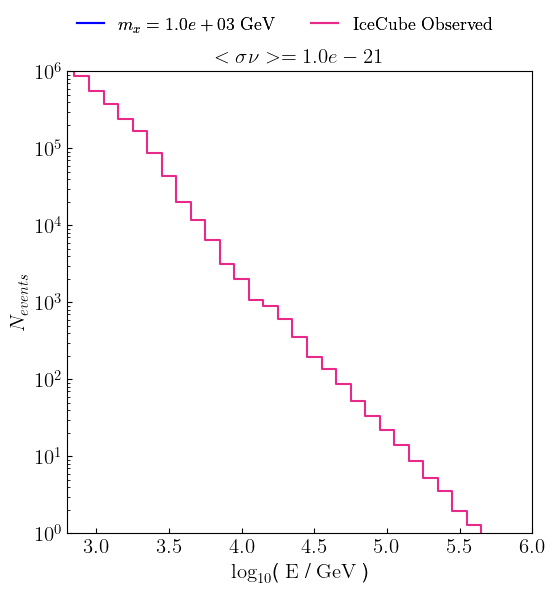

In [11]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
##ax1 = fig.add_gridspec(2, 1, hspace=0.06, wspace=0.05)
##(ax1) = gs.subplots( sharex=True, sharey=True)
#
#
ax1.set_title(r'$<\sigma \nu> = $ $%.1e$' % (sv_grid[sv_7]), fontsize=fontsize)
ax1.step(np.log10(e_grid[-len(signal_nu[0][0]):]), signal_tt_des[0][0], color='b', linestyle='-',
         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_3_id]))
#ax10p(010(e_grid[-len(signal_nu[0][1]):]), signal_nu[sv_7][m_4_id], color=color_4, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid[-len(signal_nu[sv_56][m_3_id]):]), signal_nu[sv_7][m_6_id], color=color_6, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_6_id]))
#
#
ax1.step(np.log10(e_grid[-len(signal_tt[sv_56][m_3_id]):]), np.sum(background_ic['numu'], axis=0)[-len(signal_tt[sv_56][m_3_id]):], '-', color=color_ice, label=r'$\textrm{IceCube Observed}$')

ax1.set_yscale("log")
ax1.set_xlabel(r'$\log_{10}$( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
ax1.set_ylabel(r'$N_{events}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2.8, 6)
ax1.set_ylim(1e0,1e6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

plt.show()
#figure.savefig(PICS + "Final_signal_ice"+".png",
#               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [12]:
signal_nu[0][1] #-signal_nu[0][0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.03246074e-06, 1.41293606e-05, 3.43357172e-05,
       9.98843325e-05, 1.93326243e-04, 4.23272075e-04, 7.92099933e-04,
       1.36461132e-03, 2.27821249e-03, 2.79081704e-03, 3.65461012e-03,
       5.22435460e-03, 1.03575902e-02, 2.63605228e-02, 5.62189135e-02,
       1.54901152e-01, 2.90265463e-01, 4.46893402e-01, 4.81812179e-01,
       3.87287835e-01, 2.76822905e-01, 1.91732518e-01, 1.52927639e-01,
       1.05425751e-01, 6.19397968e-02, 3.09785925e-02, 1.38996137e-02,
       8.58281035e-03, 4.20536619e-03, 2.47050757e-03, 1.51330939e-03,
       1.06312903e-03, 5.24342217e-04, 3.11528620e-04, 1.53323150e-05,
      

In [13]:
sv_grid[8]

1e-21